#Lab assignment 1a - Classification with a single-layer perceptron

In [32]:
import numpy as np
import matplotlib.pyplot as plt

## 0 - Useful functions

In [33]:
def GenerateData(n, mA, mB, sigmaA, sigmaB, n_input=2, delta=False, bias=True, separated=False):
  # inputs
  classA = np.random.randn(n_input, n) * sigmaA + np.reshape(mA,(n_input,1))
  classB = np.random.randn(n_input, n) * sigmaB + np.reshape(mB,(n_input,1))
  # Separated
  up = np.concatenate([-2*mA[0]*np.ones(n//2), np.zeros(n//2)])
  separate = np.vstack([up, np.zeros(n)])
  if separated==True: classA+=separate
  # outputs
  if delta:
    classA = np.vstack([classA, -np.ones((1, n))])
  else:
    classA = np.vstack([classA, np.zeros((1, n))])
  classB = np.vstack([classB, np.ones((1, n))])
  # gather classes
  data = np.concatenate((classA, classB), axis=1)
  # shuffle
  data = data.T
  np.random.shuffle(data)
  data = data.T
  # inputs & outputs
  x = data[:-1,:]
  t = data[-1,:]
  # Add bias if needed
  if bias: x = np.vstack([np.ones((1,2*n)), x])
  return x, t

In [34]:
def data_to_class(x, t, delta=False, bias=True):

  x_bis = np.copy(x)
  t_bis = np.copy(t)

  if bias: x_bis=x_bis[1:]
  if delta:
    for i in range(len(t_bis)):
      if t_bis[i]==(-1): t_bis[i] = 0

  classA = []
  classB = []

  x_bis = x_bis.T
  for i in range(len(t_bis)):
    if t_bis[i]: classB.append(x_bis[i])
    else: classA.append(x_bis[i])

  classA = np.array(classA)
  classB = np.array(classB)

  return classA.T, classB.T

In [35]:
def delete(x, ind):
  x_bis = []
  for i in range(len(x)):
    if not(i in ind): x_bis.append(x[i])
  return np.array(x_bis)

In [36]:
def subsample(x, t, p, delta=False):

  x_bis = np.copy(x)
  t_bis = np.copy(t)
  data = np.vstack([x_bis,t_bis])
  pA, pB = p
  n = len(t_bis)

  if delta:
    for i in range(len(t_bis)):
      if t_bis[i]==(-1): t_bis[i] = 0

  indicesClassA = []
  indicesClassB = []
  for i in range(len(t_bis)):
    if t_bis[i]: indicesClassB.append(i)
    else: indicesClassA.append(i)
  nA = len(indicesClassA)
  nB = len(indicesClassB)

  toRemove = []

  for i in range(int(pA*nA)):
    j = np.random.choice(indicesClassA)
    indicesClassA.remove(j)
    toRemove.append(j)

  for i in range(int(pB*nB)):
    j = np.random.choice(indicesClassB)
    indicesClassB.remove(j)
    toRemove.append(j)

  toRemove = np.array(toRemove)
  x_bis = x_bis.T
  x_bis = delete(x_bis, toRemove)
  x_bis = x_bis.T
  t_bis = delete(t_bis, toRemove)

  if delta:
    for i in range(len(t_bis)):
      if t_bis[i]==0: t_bis[i] = (-1)

  return x_bis, t_bis

In [37]:
def split_data(x,t,p):

  n = len(x[0])
  n0 = int(n*p[0])
  n1 = int(n*(p[0]+p[1]))

  x_train = x[:,:n0]
  x_val = x[:,n0:n1]
  x_test = x[:,n1:]
  t_train = t[:n0]
  t_val = t[n0:n1]
  t_test = t[n1:]

  return x_train, x_val, x_test, t_train, t_val, t_test

In [38]:
def initialize_weights(n_input=2, n_output=1, bias=True):
  if bias: n_input+=1
  W = 0.01*np.random.randn(n_output, n_input)
  return W

In [39]:
def getClass(x, W, mode):
  y = np.dot(W,x)
  if mode == 'Perceptron': return (y>=0)
  elif mode == 'Delta': return np.sign(y)

In [40]:
def getErrorRate(x, t, W, mode):
  err = np.mean(getClass(x,W,mode)!=t)
  return err

In [41]:
def followError(data, W, epochs, training_errors, validation_errors, mode, i=0):

  x_train, x_val, x_test, t_train, t_val, t_test = data

  training_error = getErrorRate(x_train, t_train, W, mode)
  validation_error = getErrorRate(x_val, t_val, W, mode)
  training_errors.append(training_error)
  validation_errors.append(validation_error)
  print(f'Epochs {i}/{epochs}:')
  print(f'\tTraining Error: {training_errors[-1]}')
  print(f'\tValidation Error: {validation_errors[-1]}')

##    1 - Generation

In [42]:
n = 200
mA = [20,20]
mB = [5,5]
sigmaA = 3
sigmaB = 3

In [43]:
x, t = GenerateData(n, mA, mB, sigmaA, sigmaB)

In [44]:
classA, classB = data_to_class(x,t)

[]

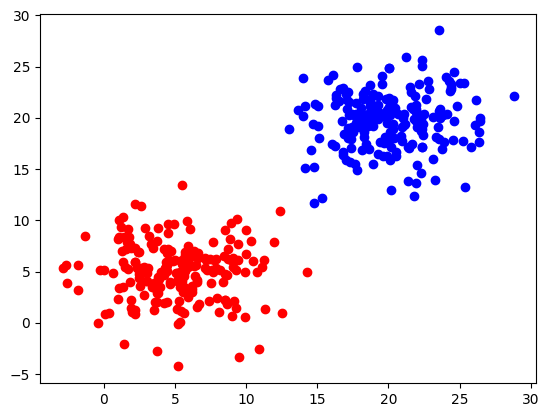

In [45]:
plt.scatter(classA[0,:], classA[1,:], color='blue')
plt.scatter(classB[0,:], classB[1,:], color='red')
plt.plot()

## 2 - Single Layer Perceptron

In [46]:
data = split_data(x,t,(0.8,0.1))

In [47]:
def perceptron_learning(data, epochs=50, learning_rate=0.001):

  W = initialize_weights()
  x_train, x_val, x_test, t_train, t_val, t_test = data

  training_errors = []
  validation_errors = []
  followError(data, W, epochs, training_errors, validation_errors, 'Perceptron')

  # IMPORTANT CODE: Perceptron algorithm
  for i in range(epochs):
    for j in range(len(x_train[0])):
      y = np.dot(W, x_train[:,j])
      y = (y>=0).astype(float)
      W += learning_rate*(t[j]-y)*x_train[:,j]
    followError(data, W, epochs, training_errors, validation_errors, 'Perceptron', i+1)
  #END OF IMPORTANT CODE

  print("End of Learning")
  test_error = getErrorRate(x_test,t_test,W,'Perceptron')
  print(f'\tTest Error: {test_error}')

  # Showing the evolution of error
  updates = np.arange(0,epochs+1,1)
  plt.plot(updates, training_errors, color='green', label='Training Error')
  plt.plot(updates, validation_errors, color='red', label='Validation error')
  plt.xlabel('Weight updates')
  plt.ylabel('Error rate')
  plt.legend()
  plt.grid()
  plt.xlim(0,epochs)
  plt.ylim(0,1)
  plt.show()

  return W

Epochs 0/20:
	Training Error: 0.5125
	Validation Error: 0.45
Epochs 1/20:
	Training Error: 0.4125
	Validation Error: 0.35
Epochs 2/20:
	Training Error: 0.025
	Validation Error: 0.075
Epochs 3/20:
	Training Error: 0.015625
	Validation Error: 0.075
Epochs 4/20:
	Training Error: 0.0
	Validation Error: 0.05
Epochs 5/20:
	Training Error: 0.0
	Validation Error: 0.05
Epochs 6/20:
	Training Error: 0.0
	Validation Error: 0.05
Epochs 7/20:
	Training Error: 0.0
	Validation Error: 0.05
Epochs 8/20:
	Training Error: 0.0
	Validation Error: 0.05
Epochs 9/20:
	Training Error: 0.0
	Validation Error: 0.05
Epochs 10/20:
	Training Error: 0.0
	Validation Error: 0.05
Epochs 11/20:
	Training Error: 0.0
	Validation Error: 0.05
Epochs 12/20:
	Training Error: 0.0
	Validation Error: 0.05
Epochs 13/20:
	Training Error: 0.0
	Validation Error: 0.05
Epochs 14/20:
	Training Error: 0.0
	Validation Error: 0.05
Epochs 15/20:
	Training Error: 0.0
	Validation Error: 0.05
Epochs 16/20:
	Training Error: 0.0
	Validation Erro

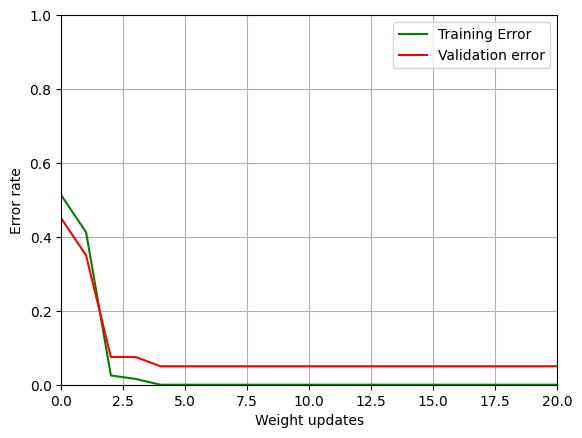

In [48]:
W1 = perceptron_learning(data, 20)

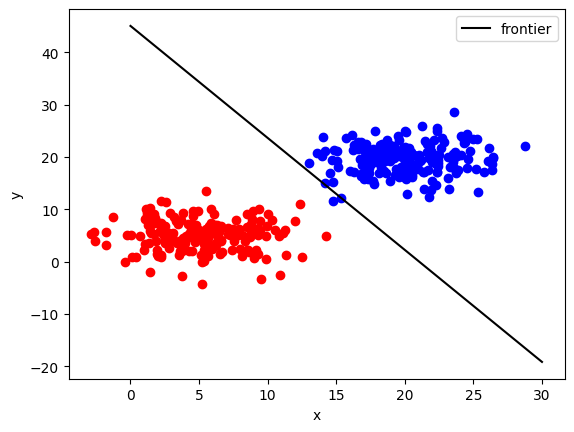

In [49]:
x_bis = np.linspace(0,30,100)
y = -(W1[0,1]/W1[0,2])*x_bis-(W1[0,0]/W1[0,2])
plt.plot(x_bis,y, color='black', label='frontier')
plt.scatter(classA[0,:], classA[1,:], color='blue')
plt.scatter(classB[0,:], classB[1,:], color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Learning Rate for Perceptron Learning

In [50]:
def perceptron_learning(data, epochs=50, learning_rate=0.001):

  W = initialize_weights()
  x_train, x_val, x_test, t_train, t_val, t_test = data

  training_errors = []
  validation_errors = []
  followError(data, W, epochs, training_errors, validation_errors, 'Perceptron')

  # IMPORTANT CODE: Perceptron algorithm
  for i in range(epochs):
    for j in range(len(x_train[0])):
      y = np.dot(W, x_train[:,j])
      y = (y>=0).astype(float)
      W += learning_rate*(t[j]-y)*x_train[:,j]
    followError(data, W, epochs, training_errors, validation_errors, 'Perceptron', i+1)
  #END OF IMPORTANT CODE

  print("End of Learning")
  test_error = getErrorRate(x_test,t_test,W,'Perceptron')
  print(f'\tTest Error: {test_error}')

  # Showing the evolution of error
  updates = np.arange(0,epochs+1,1)
  plt.plot(updates, training_errors, color='green', label='Training Error')
  plt.plot(updates, validation_errors, color='red', label='Validation error')
  plt.xlabel('Weight updates')
  plt.ylabel('Error rate')
  plt.legend()
  plt.grid()
  plt.xlim(0,epochs)
  plt.ylim(0,1)
  plt.show()

  return W

## 2bis - Delta Rule

In [51]:
x_delta, t_delta = GenerateData(n, mA, mB, sigmaA, sigmaB, delta=True)
classA_delta, classB_delta = data_to_class(x_delta, t_delta, delta=True)
data_delta = split_data(x_delta,t_delta,(0.8,0.1))

In [52]:
def delta_learning(data, epochs=50, learning_rate=0.001):

  W = initialize_weights()
  x_train, x_val, x_test, t_train, t_val, t_test = data

  training_errors = []
  validation_errors = []
  followError(data, W, epochs, training_errors, validation_errors, 'Delta')

  # IMPORTANT CODE: Delta algorithm
  for i in range(epochs):
    for j in range(len(x_train[0])):
      y = np.dot(W, x_train[:,j])
      W += learning_rate*(t_train[j]-y)*x_train[:,j]
    followError(data, W, epochs, training_errors, validation_errors, 'Delta', i+1)
  #END OF IMPORTANT CODE

  print("End of Learning")
  test_error = getErrorRate(x_test,t_test,W,'Delta')
  print(f'\tTest Error: {test_error}')

  # Showing the evolution of error
  updates = np.arange(0,len(training_errors),1)
  plt.plot(updates, training_errors, color='green', label='Training Error')
  plt.plot(updates, validation_errors, color='red', label='Validation error')
  plt.xlabel('Number of epochs')
  plt.ylabel('Error rate')
  plt.legend()
  plt.grid()
  plt.xlim(0,epochs)
  plt.ylim(0,1)
  plt.show()

  return W

Epochs 0/20:
	Training Error: 0.496875
	Validation Error: 0.475
Epochs 1/20:
	Training Error: 0.284375
	Validation Error: 0.325
Epochs 2/20:
	Training Error: 0.128125
	Validation Error: 0.025
Epochs 3/20:
	Training Error: 0.046875
	Validation Error: 0.0
Epochs 4/20:
	Training Error: 0.021875
	Validation Error: 0.0
Epochs 5/20:
	Training Error: 0.0125
	Validation Error: 0.0
Epochs 6/20:
	Training Error: 0.0125
	Validation Error: 0.0
Epochs 7/20:
	Training Error: 0.0125
	Validation Error: 0.0
Epochs 8/20:
	Training Error: 0.0125
	Validation Error: 0.0
Epochs 9/20:
	Training Error: 0.0125
	Validation Error: 0.0
Epochs 10/20:
	Training Error: 0.009375
	Validation Error: 0.0
Epochs 11/20:
	Training Error: 0.00625
	Validation Error: 0.0
Epochs 12/20:
	Training Error: 0.00625
	Validation Error: 0.0
Epochs 13/20:
	Training Error: 0.00625
	Validation Error: 0.0
Epochs 14/20:
	Training Error: 0.00625
	Validation Error: 0.0
Epochs 15/20:
	Training Error: 0.00625
	Validation Error: 0.0
Epochs 16/2

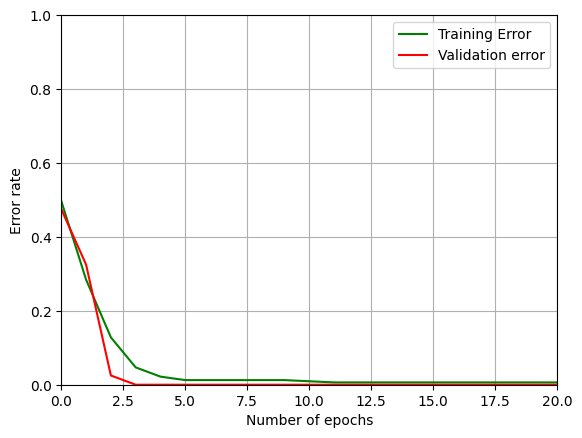

In [53]:
W2 = delta_learning(data_delta, epochs=20, learning_rate=0.001)

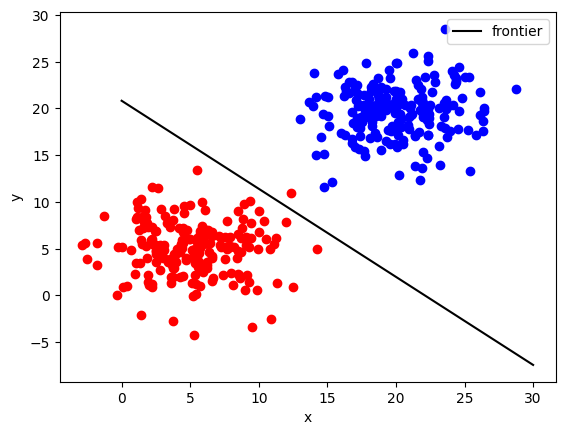

In [54]:
x_bis = np.linspace(0,30,100)
y = -(W2[0,1]/W2[0,2])*x_bis-(W2[0,0]/W2[0,2])
plt.plot(x_bis,y, color='black', label='frontier')
plt.scatter(classA[0,:], classA[1,:], color='blue')
plt.scatter(classB[0,:], classB[1,:], color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Sequential vs Batch Learning

In [55]:
def delta_batch_learning(data, epochs=20, learning_rate=0.001, bias=True):

  if bias: W = initialize_weights()
  else: W = initialize_weights(bias=False)
  x_train, x_val, x_test, t_train, t_val, t_test = data

  training_errors = []
  validation_errors = []
  followError(data, W, epochs, training_errors, validation_errors, 'Delta')

  # IMPORTANT CODE: Delta algorithm (batch)
  for i in range(epochs):
    W += -learning_rate*np.dot(np.dot(W, x_train)-t_train, x_train.T)/len(x[0])
    followError(data, W, epochs, training_errors, validation_errors, 'Delta', i+1)
  #END OF IMPORTANT CODE

  print("End of Learning")
  test_error = getErrorRate(x_test,t_test,W,'Delta')
  print(f'\tTest Error: {test_error}')

  updates = np.arange(0,epochs+1,1)
  plt.plot(updates, training_errors, color='green', label='Training Error')
  plt.plot(updates, validation_errors, color='red', label='Validation error')
  plt.xlabel('Number of epochs')
  plt.ylabel('Error rate')
  plt.legend()
  plt.grid()
  plt.xlim(0,epochs)
  plt.ylim(0,1)
  plt.show()

  return W



Epochs 0/1000:
	Training Error: 0.4875
	Validation Error: 0.525
Epochs 1/1000:
	Training Error: 0.5125
	Validation Error: 0.475
Epochs 2/1000:
	Training Error: 0.50625
	Validation Error: 0.475
Epochs 3/1000:
	Training Error: 0.509375
	Validation Error: 0.475
Epochs 4/1000:
	Training Error: 0.509375
	Validation Error: 0.475
Epochs 5/1000:
	Training Error: 0.509375
	Validation Error: 0.475
Epochs 6/1000:
	Training Error: 0.509375
	Validation Error: 0.475
Epochs 7/1000:
	Training Error: 0.509375
	Validation Error: 0.475
Epochs 8/1000:
	Training Error: 0.509375
	Validation Error: 0.475
Epochs 9/1000:
	Training Error: 0.509375
	Validation Error: 0.475
Epochs 10/1000:
	Training Error: 0.509375
	Validation Error: 0.475
Epochs 11/1000:
	Training Error: 0.509375
	Validation Error: 0.475
Epochs 12/1000:
	Training Error: 0.509375
	Validation Error: 0.475
Epochs 13/1000:
	Training Error: 0.509375
	Validation Error: 0.475
Epochs 14/1000:
	Training Error: 0.509375
	Validation Error: 0.475
Epochs 15/

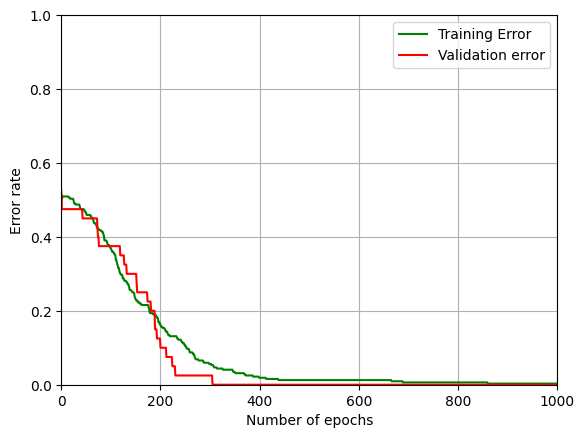

In [56]:
W3 = delta_batch_learning(data_delta, epochs=1000, learning_rate=0.005)



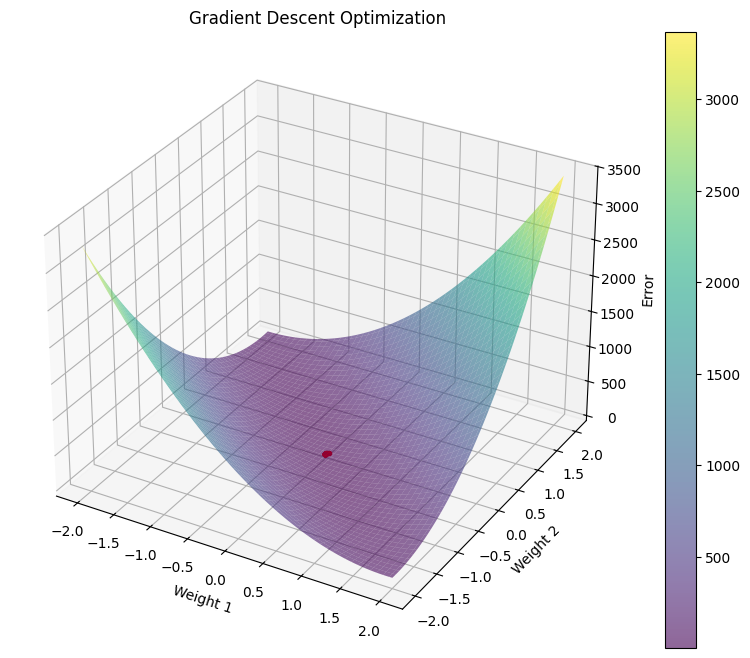

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_error_landscape(x_train, t_train, w_range=2):
    # Create mesh grid for weights
    w1 = np.linspace(-w_range, w_range, 100)
    w2 = np.linspace(-w_range, w_range, 100)
    W1, W2 = np.meshgrid(w1, w2)
    
    # Calculate error for each weight combination
    E = np.zeros(W1.shape)
    for i in range(len(w1)):
        for j in range(len(w2)):
            w = np.array([[W1[i,j], W2[i,j]]])
            y = np.dot(w, x_train)
            E[i,j] = np.mean((y - t_train)**2)
    
    return W1, W2, E

def visualize_gradient_descent(data, epochs=20, learning_rate=0.001):
    x_train, _, _, t_train, _, _ = data
    
    # Remove bias term (first row) from x_train
    x_train = x_train[1:,:]  # Keep only the 2 feature dimensions
    
    # Initialize weights without bias
    W = initialize_weights(bias=False)
    w_path = [W.flatten()]
    
    # Run batch delta learning and store weights
    for i in range(epochs):
        W += -learning_rate*np.dot(np.dot(W, x_train)-t_train, x_train.T)/len(x_train[0])
        w_path.append(W.flatten())
    
    # Create error landscape
    W1, W2, E = plot_error_landscape(x_train, t_train)
    
    # Plot surface and gradient descent path
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot error surface
    surf = ax.plot_surface(W1, W2, E, alpha=0.6, cmap='viridis')
    
    # Plot gradient descent path
    w_path = np.array(w_path)
    ax.plot(w_path[:,0], w_path[:,1], 'r.-', label='Gradient descent path')
    
    ax.set_xlabel('Weight 1')
    ax.set_ylabel('Weight 2')
    ax.set_zlabel('Error')
    ax.set_title('Gradient Descent Optimization')
    
    plt.colorbar(surf)
    plt.show()

# Use with your existing data
visualize_gradient_descent(data_delta, epochs=20, learning_rate=0.001)

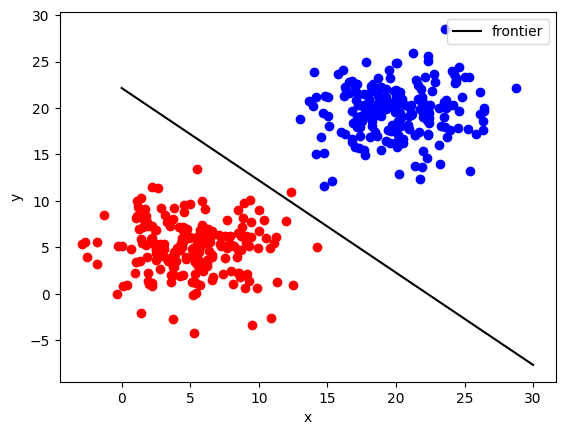

In [58]:
x_bis = np.linspace(0,30,100)
y = -(W3[0,1]/W3[0,2])*x_bis-(W3[0,0]/W3[0,2])
plt.plot(x_bis,y, color='black', label='frontier')
plt.scatter(classA[0,:], classA[1,:], color='blue')
plt.scatter(classB[0,:], classB[1,:], color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Removing the bias

In [59]:
x_unbiased, t_unbiased = GenerateData(n, mA, mB, sigmaA, sigmaB, delta=True, bias=False)
classA_unbiased, classB_unbiased = data_to_class(x_unbiased, t_unbiased, delta=True, bias=False)
data_unbiased = split_data(x_unbiased,t_unbiased,(0.8,0.1))

Epochs 0/1000:
	Training Error: 0.5125
	Validation Error: 0.525
Epochs 1/1000:
	Training Error: 0.575
	Validation Error: 0.6
Epochs 2/1000:
	Training Error: 0.478125
	Validation Error: 0.425
Epochs 3/1000:
	Training Error: 0.4875
	Validation Error: 0.45
Epochs 4/1000:
	Training Error: 0.49375
	Validation Error: 0.475
Epochs 5/1000:
	Training Error: 0.49375
	Validation Error: 0.475
Epochs 6/1000:
	Training Error: 0.49375
	Validation Error: 0.475
Epochs 7/1000:
	Training Error: 0.49375
	Validation Error: 0.475
Epochs 8/1000:
	Training Error: 0.49375
	Validation Error: 0.475
Epochs 9/1000:
	Training Error: 0.49375
	Validation Error: 0.475
Epochs 10/1000:
	Training Error: 0.49375
	Validation Error: 0.475
Epochs 11/1000:
	Training Error: 0.49375
	Validation Error: 0.475
Epochs 12/1000:
	Training Error: 0.49375
	Validation Error: 0.475
Epochs 13/1000:
	Training Error: 0.49375
	Validation Error: 0.475
Epochs 14/1000:
	Training Error: 0.49375
	Validation Error: 0.475
Epochs 15/1000:
	Training 

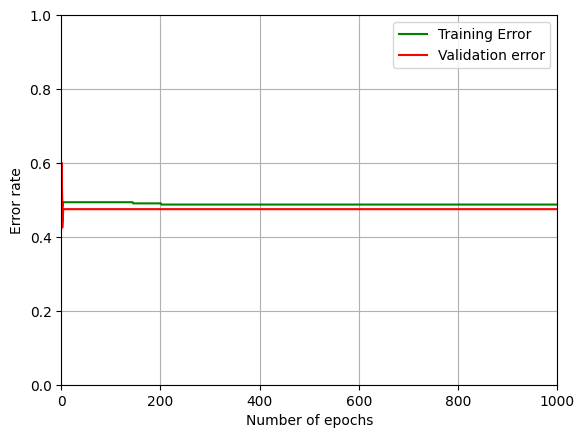

In [60]:
W4 = delta_batch_learning(data_unbiased, epochs=1000, learning_rate=0.001, bias=False)

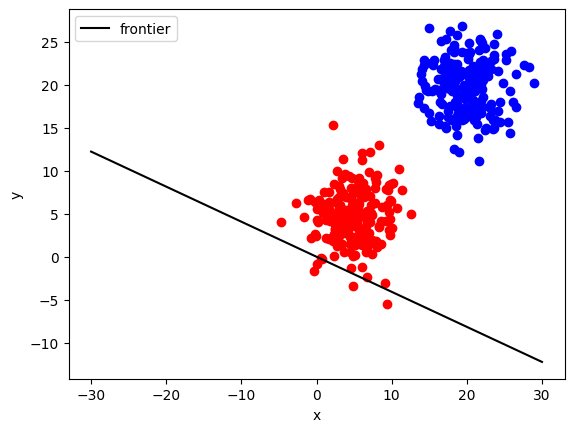

In [61]:
x_bis = np.linspace(-30,30,100)
y = -(W4[0,0]/W4[0,1])*x_bis
plt.plot(x_bis,y, color='black', label='frontier')
plt.scatter(classA_unbiased[0,:], classA_unbiased[1,:], color='blue')
plt.scatter(classB_unbiased[0,:], classB_unbiased[1,:], color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [62]:
n = 200
mA = [0,20]
mB = [-10,-10]
sigmaA = 3
sigmaB = 3

In [63]:
x_unbiased, t_unbiased = GenerateData(n, mA, mB, sigmaA, sigmaB, delta=True, bias=False)
classA_unbiased, classB_unbiased = data_to_class(x_unbiased, t_unbiased, delta=True, bias=False)
data_unbiased = split_data(x_unbiased,t_unbiased,(0.8,0.1))

Epochs 0/20:
	Training Error: 1.0
	Validation Error: 1.0
Epochs 1/20:
	Training Error: 0.015625
	Validation Error: 0.05
Epochs 2/20:
	Training Error: 0.0
	Validation Error: 0.0
Epochs 3/20:
	Training Error: 0.0
	Validation Error: 0.0
Epochs 4/20:
	Training Error: 0.0
	Validation Error: 0.0
Epochs 5/20:
	Training Error: 0.0
	Validation Error: 0.0
Epochs 6/20:
	Training Error: 0.0
	Validation Error: 0.0
Epochs 7/20:
	Training Error: 0.0
	Validation Error: 0.0
Epochs 8/20:
	Training Error: 0.0
	Validation Error: 0.0
Epochs 9/20:
	Training Error: 0.0
	Validation Error: 0.0
Epochs 10/20:
	Training Error: 0.0
	Validation Error: 0.0
Epochs 11/20:
	Training Error: 0.0
	Validation Error: 0.0
Epochs 12/20:
	Training Error: 0.0
	Validation Error: 0.0
Epochs 13/20:
	Training Error: 0.0
	Validation Error: 0.0
Epochs 14/20:
	Training Error: 0.0
	Validation Error: 0.0
Epochs 15/20:
	Training Error: 0.0
	Validation Error: 0.0
Epochs 16/20:
	Training Error: 0.0
	Validation Error: 0.0
Epochs 17/20:
	Tra

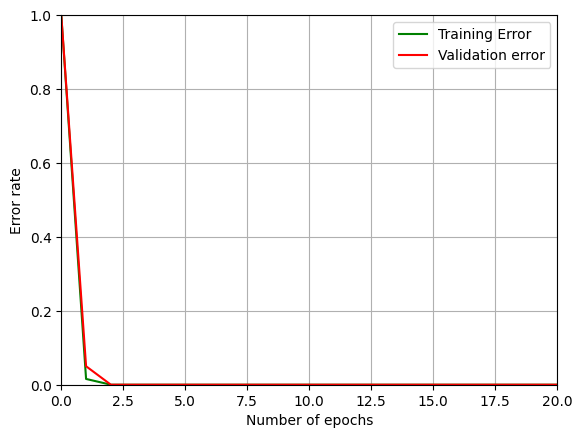

In [64]:
W4 = delta_batch_learning(data_unbiased, learning_rate=0.001, bias=False)

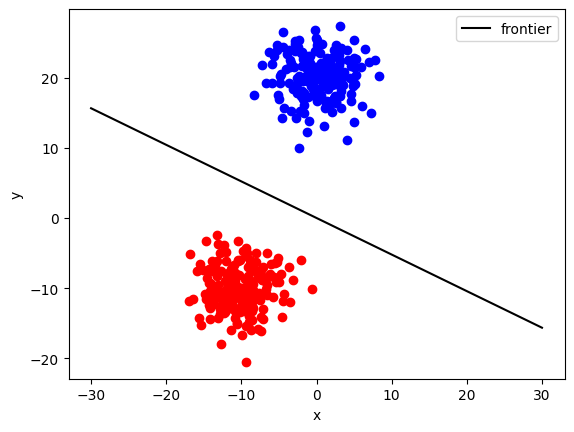

In [65]:
x_bis = np.linspace(-30,30,100)
y = -(W4[0,0]/W4[0,1])*x_bis
plt.plot(x_bis,y, color='black', label='frontier')
plt.scatter(classA_unbiased[0,:], classA_unbiased[1,:], color='blue')
plt.scatter(classB_unbiased[0,:], classB_unbiased[1,:], color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## 3 - Classification of samples that are not linearly separable

In [66]:
n = 200
mA = [20,20]
mB = [5,5]
sigmaA = 5
sigmaB = 5

In [67]:
x, t = GenerateData(n, mA, mB, sigmaA, sigmaB)
classA, classB = data_to_class(x, t)

[]

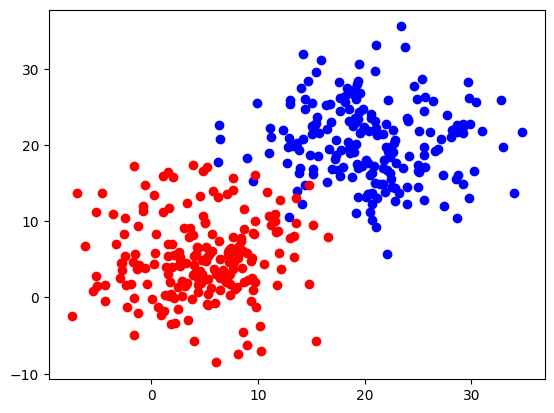

In [68]:
plt.scatter(classA[0,:], classA[1,:], color='blue')
plt.scatter(classB[0,:], classB[1,:], color='red')
plt.plot()

In [69]:
data_NLS = split_data(x,t,(0.8,0.1))

Epochs 0/2000:
	Training Error: 0.396875
	Validation Error: 0.425
Epochs 1/2000:
	Training Error: 0.384375
	Validation Error: 0.325
Epochs 2/2000:
	Training Error: 0.3625
	Validation Error: 0.325
Epochs 3/2000:
	Training Error: 0.259375
	Validation Error: 0.2
Epochs 4/2000:
	Training Error: 0.275
	Validation Error: 0.225
Epochs 5/2000:
	Training Error: 0.240625
	Validation Error: 0.2
Epochs 6/2000:
	Training Error: 0.296875
	Validation Error: 0.25
Epochs 7/2000:
	Training Error: 0.2375
	Validation Error: 0.175
Epochs 8/2000:
	Training Error: 0.278125
	Validation Error: 0.225
Epochs 9/2000:
	Training Error: 0.1375
	Validation Error: 0.125
Epochs 10/2000:
	Training Error: 0.0125
	Validation Error: 0.0
Epochs 11/2000:
	Training Error: 0.0125
	Validation Error: 0.0
Epochs 12/2000:
	Training Error: 0.06875
	Validation Error: 0.05
Epochs 13/2000:
	Training Error: 0.03125
	Validation Error: 0.0
Epochs 14/2000:
	Training Error: 0.0375
	Validation Error: 0.0
Epochs 15/2000:
	Training Error: 0.2

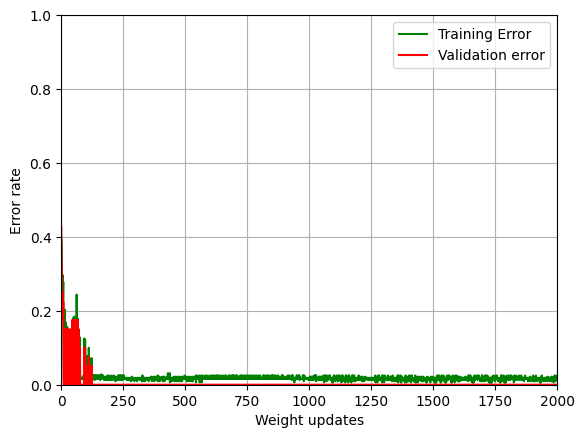

In [70]:
W5 = perceptron_learning(data_NLS, 2000)

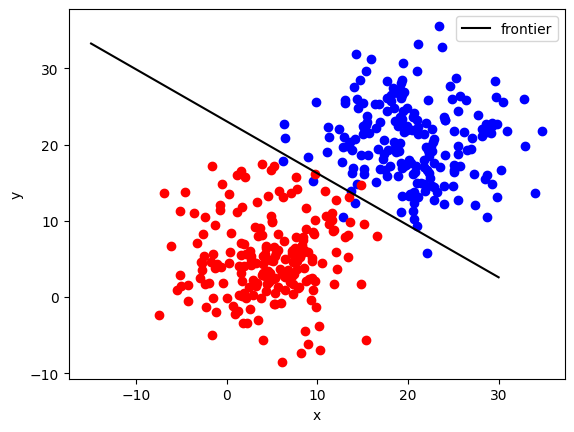

In [71]:
x_bis = np.linspace(-15,30,100)
y = -(W5[0,1]/W5[0,2])*x_bis-(W5[0,0]/W5[0,2])
plt.plot(x_bis,y, color='black', label='frontier')
plt.scatter(classA[0,:], classA[1,:], color='blue')
plt.scatter(classB[0,:], classB[1,:], color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [72]:
x_NLS_delta, t_NLS_delta = GenerateData(n, mA, mB, sigmaA, sigmaB, delta=True)
classA_NLS_delta, classB_NLS_delta = data_to_class(x_NLS_delta, t_NLS_delta, delta=True)
data_NLS_delta = split_data(x_NLS_delta,t_NLS_delta,(0.8,0.1))

Epochs 0/200:
	Training Error: 0.346875
	Validation Error: 0.35
Epochs 1/200:
	Training Error: 0.175
	Validation Error: 0.25
Epochs 2/200:
	Training Error: 0.078125
	Validation Error: 0.15
Epochs 3/200:
	Training Error: 0.040625
	Validation Error: 0.075
Epochs 4/200:
	Training Error: 0.0375
	Validation Error: 0.05
Epochs 5/200:
	Training Error: 0.03125
	Validation Error: 0.05
Epochs 6/200:
	Training Error: 0.028125
	Validation Error: 0.05
Epochs 7/200:
	Training Error: 0.015625
	Validation Error: 0.025
Epochs 8/200:
	Training Error: 0.015625
	Validation Error: 0.025
Epochs 9/200:
	Training Error: 0.0125
	Validation Error: 0.025
Epochs 10/200:
	Training Error: 0.0125
	Validation Error: 0.025
Epochs 11/200:
	Training Error: 0.0125
	Validation Error: 0.025
Epochs 12/200:
	Training Error: 0.0125
	Validation Error: 0.025
Epochs 13/200:
	Training Error: 0.0125
	Validation Error: 0.025
Epochs 14/200:
	Training Error: 0.0125
	Validation Error: 0.025
Epochs 15/200:
	Training Error: 0.0125
	Vali

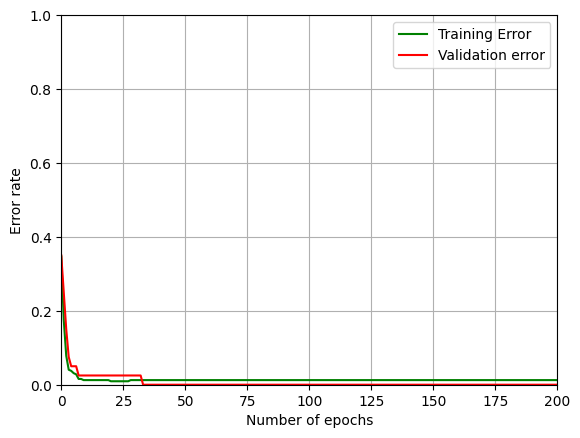

In [73]:
W6 = delta_learning(data_NLS_delta, epochs = 200)

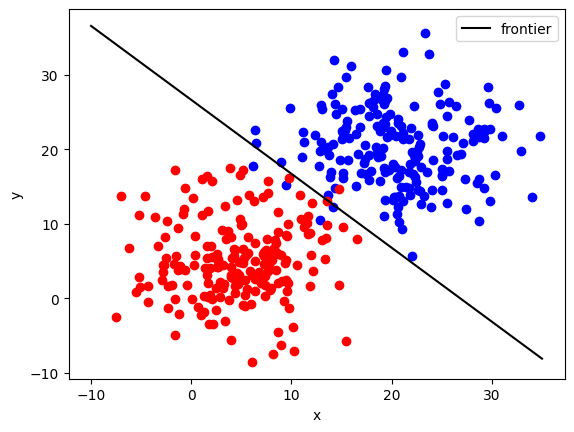

In [74]:
x_bis = np.linspace(-10,35,100)
y = -(W6[0,1]/W6[0,2])*x_bis-(W6[0,0]/W6[0,2])
plt.plot(x_bis,y, color='black', label='frontier')
plt.scatter(classA[0,:], classA[1,:], color='blue')
plt.scatter(classB[0,:], classB[1,:], color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Epochs 0/3000:
	Training Error: 0.46875
	Validation Error: 0.45
Epochs 1/3000:
	Training Error: 0.475
	Validation Error: 0.45
Epochs 2/3000:
	Training Error: 0.471875
	Validation Error: 0.45
Epochs 3/3000:
	Training Error: 0.46875
	Validation Error: 0.45
Epochs 4/3000:
	Training Error: 0.46875
	Validation Error: 0.45
Epochs 5/3000:
	Training Error: 0.46875
	Validation Error: 0.45
Epochs 6/3000:
	Training Error: 0.46875
	Validation Error: 0.45
Epochs 7/3000:
	Training Error: 0.46875
	Validation Error: 0.45
Epochs 8/3000:
	Training Error: 0.46875
	Validation Error: 0.45
Epochs 9/3000:
	Training Error: 0.46875
	Validation Error: 0.45
Epochs 10/3000:
	Training Error: 0.46875
	Validation Error: 0.45
Epochs 11/3000:
	Training Error: 0.46875
	Validation Error: 0.45
Epochs 12/3000:
	Training Error: 0.46875
	Validation Error: 0.45
Epochs 13/3000:
	Training Error: 0.46875
	Validation Error: 0.45
Epochs 14/3000:
	Training Error: 0.46875
	Validation Error: 0.45
Epochs 15/3000:
	Training Error: 0.4

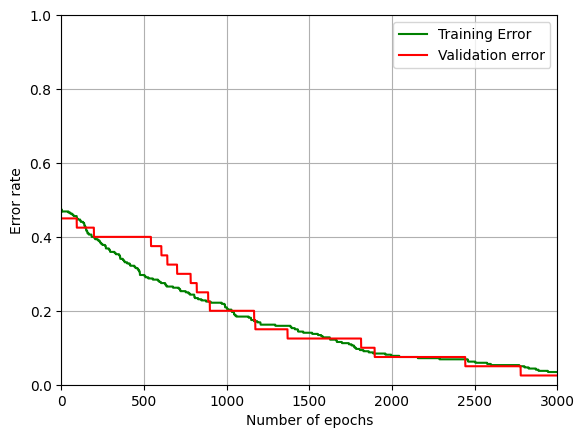

In [75]:
W7 = delta_batch_learning(data_NLS_delta, epochs=3000)

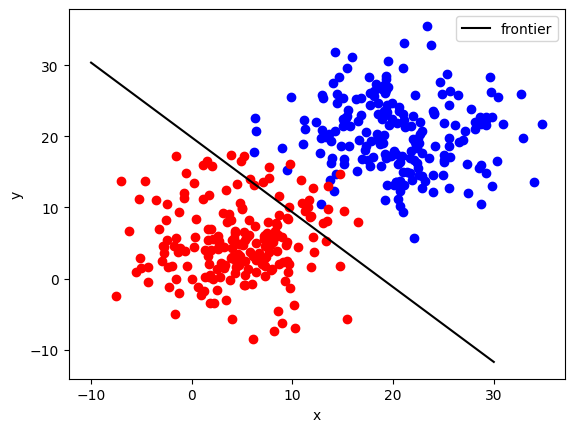

In [76]:
x_bis = np.linspace(-10,30,100)
y = -(W7[0,1]/W7[0,2])*x_bis-(W7[0,0]/W7[0,2])
plt.plot(x_bis,y, color='black', label='frontier')
plt.scatter(classA[0,:], classA[1,:], color='blue')
plt.scatter(classB[0,:], classB[1,:], color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [77]:
n = 200
mA = [20,20]
mB = [5,5]
sigmaA = 3
sigmaB = 3

In [78]:
x_separated, t_separated = GenerateData(n, mA, mB, sigmaA, sigmaB, delta=True, separated=True)
classA_separated, classB_separated = data_to_class(x_separated, t_separated, delta=True)

[]

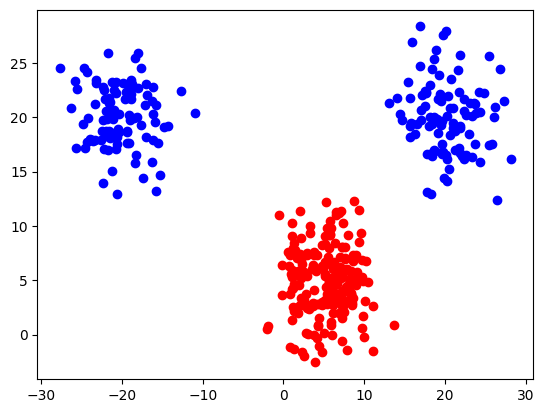

In [79]:
plt.scatter(classA_separated[0,:], classA_separated[1,:], color='blue')
plt.scatter(classB_separated[0,:], classB_separated[1,:], color='red')
plt.plot()

In [80]:
data_separated = split_data(x_separated,t_separated,(0.8,0.1))

Epochs 0/3000:
	Training Error: 0.55625
	Validation Error: 0.65
Epochs 1/3000:
	Training Error: 0.540625
	Validation Error: 0.6
Epochs 2/3000:
	Training Error: 0.29375
	Validation Error: 0.25
Epochs 3/3000:
	Training Error: 0.4125
	Validation Error: 0.325
Epochs 4/3000:
	Training Error: 0.415625
	Validation Error: 0.325
Epochs 5/3000:
	Training Error: 0.415625
	Validation Error: 0.325
Epochs 6/3000:
	Training Error: 0.415625
	Validation Error: 0.325
Epochs 7/3000:
	Training Error: 0.415625
	Validation Error: 0.325
Epochs 8/3000:
	Training Error: 0.415625
	Validation Error: 0.325
Epochs 9/3000:
	Training Error: 0.415625
	Validation Error: 0.325
Epochs 10/3000:
	Training Error: 0.415625
	Validation Error: 0.325
Epochs 11/3000:
	Training Error: 0.415625
	Validation Error: 0.325
Epochs 12/3000:
	Training Error: 0.415625
	Validation Error: 0.325
Epochs 13/3000:
	Training Error: 0.415625
	Validation Error: 0.325
Epochs 14/3000:
	Training Error: 0.415625
	Validation Error: 0.325
Epochs 15/300

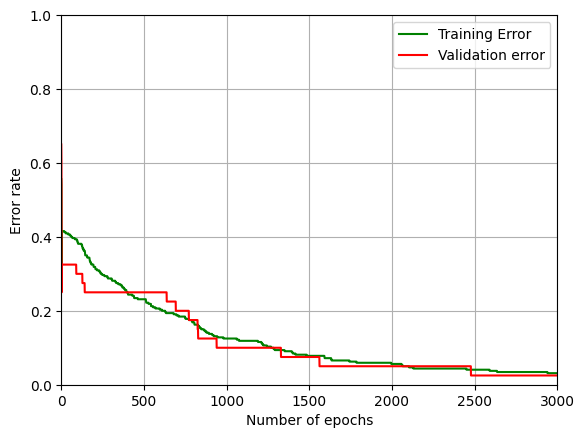

In [81]:
W8 = delta_batch_learning(data_separated, epochs=3000)

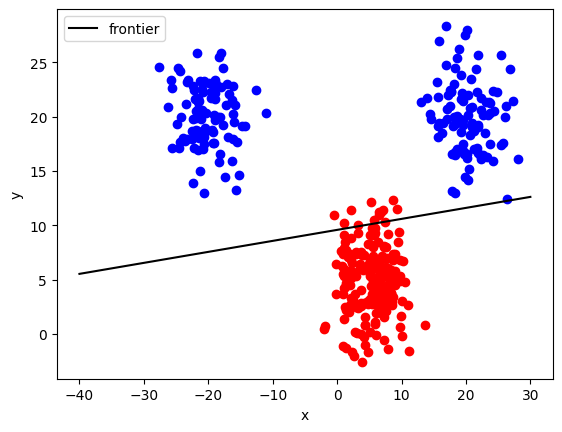

In [82]:
x_bis = np.linspace(-40,30,100)
y = -(W8[0,1]/W8[0,2])*x_bis-(W8[0,0]/W8[0,2])
plt.plot(x_bis,y, color='black', label='frontier')
plt.scatter(classA_separated[0,:], classA_separated[1,:], color='blue')
plt.scatter(classB_separated[0,:], classB_separated[1,:], color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [83]:
x_25, t_25 = subsample(x_separated, t_separated, (0.25, 0.25), delta=True)
classA_25, classB_25 = data_to_class(x_25, t_25, delta=True)

In [84]:
data_25 = split_data(x_25, t_25,(0.8,0.1))

Epochs 0/1000:
	Training Error: 0.5375
	Validation Error: 0.3333333333333333
Epochs 1/1000:
	Training Error: 0.4583333333333333
	Validation Error: 0.23333333333333334
Epochs 2/1000:
	Training Error: 0.43333333333333335
	Validation Error: 0.2
Epochs 3/1000:
	Training Error: 0.44583333333333336
	Validation Error: 0.23333333333333334
Epochs 4/1000:
	Training Error: 0.4375
	Validation Error: 0.2
Epochs 5/1000:
	Training Error: 0.4375
	Validation Error: 0.2
Epochs 6/1000:
	Training Error: 0.4375
	Validation Error: 0.2
Epochs 7/1000:
	Training Error: 0.4375
	Validation Error: 0.2
Epochs 8/1000:
	Training Error: 0.42916666666666664
	Validation Error: 0.2
Epochs 9/1000:
	Training Error: 0.42916666666666664
	Validation Error: 0.2
Epochs 10/1000:
	Training Error: 0.42916666666666664
	Validation Error: 0.2
Epochs 11/1000:
	Training Error: 0.42916666666666664
	Validation Error: 0.2
Epochs 12/1000:
	Training Error: 0.425
	Validation Error: 0.2
Epochs 13/1000:
	Training Error: 0.425
	Validation Erro

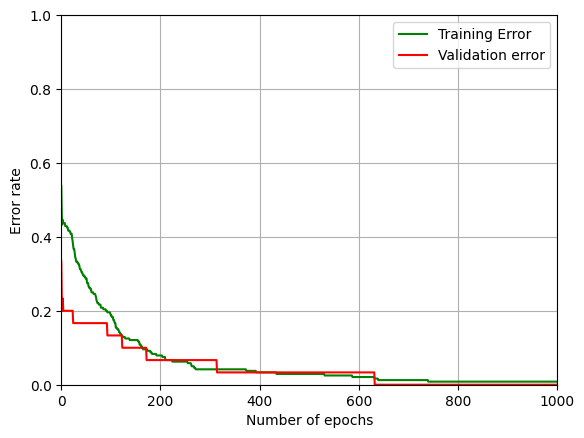

In [85]:
W9 = delta_batch_learning(data_25, epochs=1000, learning_rate = 0.01)

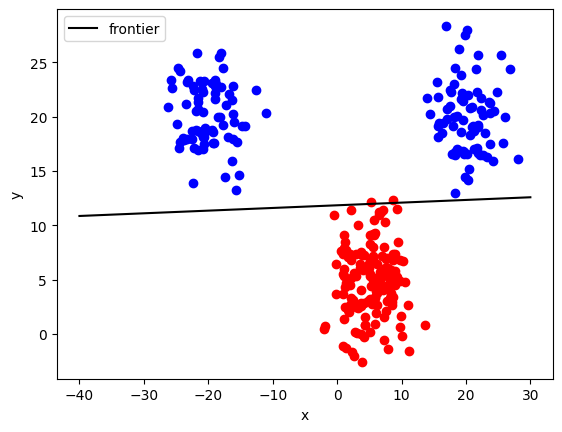

In [86]:
x_bis = np.linspace(-40,30,100)
y = -(W9[0,1]/W9[0,2])*x_bis-(W9[0,0]/W9[0,2])
plt.plot(x_bis,y, color='black', label='frontier')
plt.scatter(classA_25[0,:], classA_25[1,:], color='blue')
plt.scatter(classB_25[0,:], classB_25[1,:], color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [87]:
x_25A, t_25A = subsample(x_separated, t_separated, (0.50, 0), delta=True)
classA_25A, classB_25A = data_to_class(x_25A, t_25A, delta=True)

In [88]:
data_25A = split_data(x_25A, t_25A,(0.8,0.1))

Epochs 0/3000:
	Training Error: 0.375
	Validation Error: 0.5
Epochs 1/3000:
	Training Error: 0.35
	Validation Error: 0.4
Epochs 2/3000:
	Training Error: 0.3458333333333333
	Validation Error: 0.4
Epochs 3/3000:
	Training Error: 0.175
	Validation Error: 0.16666666666666666
Epochs 4/3000:
	Training Error: 0.15
	Validation Error: 0.13333333333333333
Epochs 5/3000:
	Training Error: 0.1625
	Validation Error: 0.13333333333333333
Epochs 6/3000:
	Training Error: 0.175
	Validation Error: 0.16666666666666666
Epochs 7/3000:
	Training Error: 0.2125
	Validation Error: 0.16666666666666666
Epochs 8/3000:
	Training Error: 0.225
	Validation Error: 0.16666666666666666
Epochs 9/3000:
	Training Error: 0.24166666666666667
	Validation Error: 0.16666666666666666
Epochs 10/3000:
	Training Error: 0.25
	Validation Error: 0.23333333333333334
Epochs 11/3000:
	Training Error: 0.2625
	Validation Error: 0.26666666666666666
Epochs 12/3000:
	Training Error: 0.26666666666666666
	Validation Error: 0.26666666666666666
Epo

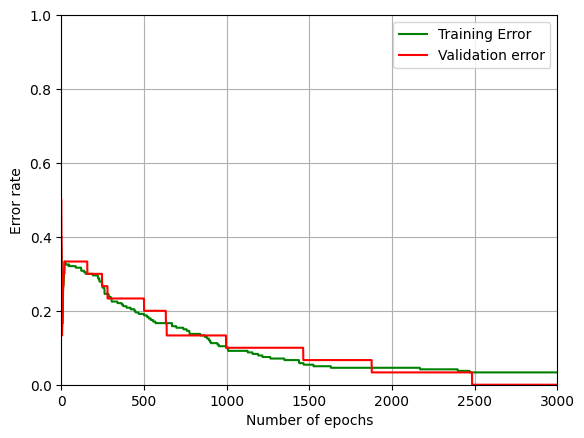

In [89]:
W10 = delta_batch_learning(data_25A, epochs=3000)

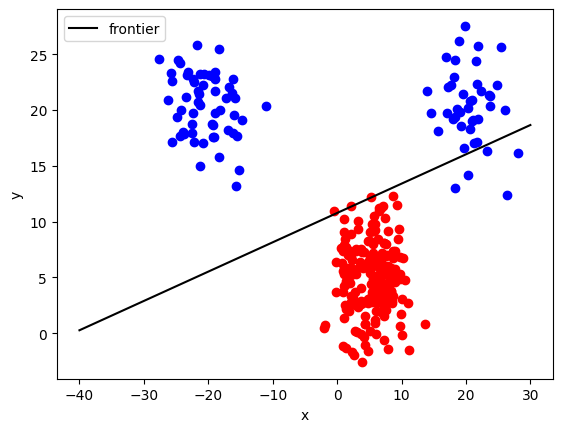

In [90]:
x_bis = np.linspace(-40,30,100)
y = -(W10[0,1]/W10[0,2])*x_bis-(W10[0,0]/W10[0,2])
plt.plot(x_bis,y, color='black', label='frontier')
plt.scatter(classA_25A[0,:], classA_25A[1,:], color='blue')
plt.scatter(classB_25A[0,:], classB_25A[1,:], color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [91]:
x_25B, t_25B = subsample(x_separated, t_separated, (0, 0.50), delta=True)
classA_25B, classB_25B = data_to_class(x_25B, t_25B, delta=True)

In [92]:
data_25B = split_data(x_25B, t_25B,(0.8,0.1))

Epochs 0/3000:
	Training Error: 0.6041666666666666
	Validation Error: 0.6
Epochs 1/3000:
	Training Error: 0.6541666666666667
	Validation Error: 0.6666666666666666
Epochs 2/3000:
	Training Error: 0.3333333333333333
	Validation Error: 0.26666666666666666
Epochs 3/3000:
	Training Error: 0.32916666666666666
	Validation Error: 0.26666666666666666
Epochs 4/3000:
	Training Error: 0.32916666666666666
	Validation Error: 0.26666666666666666
Epochs 5/3000:
	Training Error: 0.32083333333333336
	Validation Error: 0.26666666666666666
Epochs 6/3000:
	Training Error: 0.31666666666666665
	Validation Error: 0.26666666666666666
Epochs 7/3000:
	Training Error: 0.3125
	Validation Error: 0.26666666666666666
Epochs 8/3000:
	Training Error: 0.3125
	Validation Error: 0.26666666666666666
Epochs 9/3000:
	Training Error: 0.3125
	Validation Error: 0.26666666666666666
Epochs 10/3000:
	Training Error: 0.3125
	Validation Error: 0.26666666666666666
Epochs 11/3000:
	Training Error: 0.3125
	Validation Error: 0.266666666

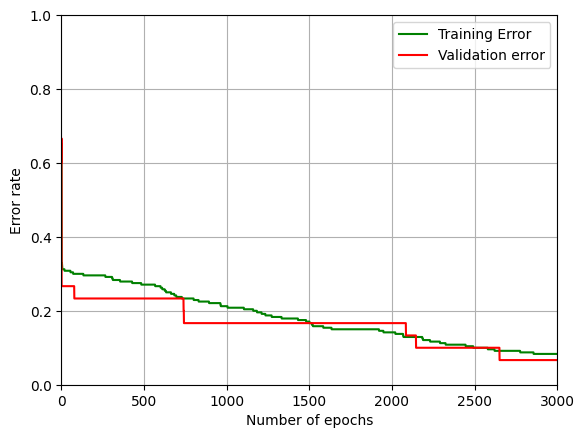

In [93]:
W11 = delta_batch_learning(data_25B, epochs=3000)

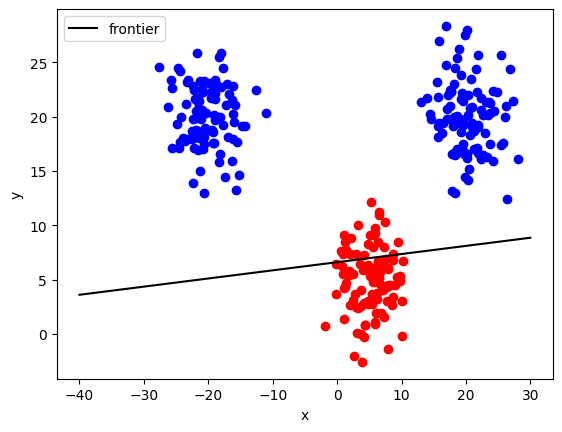

In [94]:
x_bis = np.linspace(-40,30,100)
y = -(W11[0,1]/W11[0,2])*x_bis-(W11[0,0]/W11[0,2])
plt.plot(x_bis,y, color='black', label='frontier')
plt.scatter(classA_25B[0,:], classA_25B[1,:], color='blue')
plt.scatter(classB_25B[0,:], classB_25B[1,:], color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [95]:
x_T, t_T = subsample(x_separated, t_separated, (0, 0.80), delta=True)
classA_T, classB_T = data_to_class(x_T, t_T, delta=True)

In [96]:
data_T = split_data(x_T, t_T,(0.8,0.1))

Epochs 0/3000:
	Training Error: 0.421875
	Validation Error: 0.4166666666666667
Epochs 1/3000:
	Training Error: 0.4270833333333333
	Validation Error: 0.4166666666666667
Epochs 2/3000:
	Training Error: 0.421875
	Validation Error: 0.375
Epochs 3/3000:
	Training Error: 0.16666666666666666
	Validation Error: 0.08333333333333333
Epochs 4/3000:
	Training Error: 0.14583333333333334
	Validation Error: 0.08333333333333333
Epochs 5/3000:
	Training Error: 0.15104166666666666
	Validation Error: 0.08333333333333333
Epochs 6/3000:
	Training Error: 0.16145833333333334
	Validation Error: 0.08333333333333333
Epochs 7/3000:
	Training Error: 0.16145833333333334
	Validation Error: 0.08333333333333333
Epochs 8/3000:
	Training Error: 0.16145833333333334
	Validation Error: 0.08333333333333333
Epochs 9/3000:
	Training Error: 0.16666666666666666
	Validation Error: 0.08333333333333333
Epochs 10/3000:
	Training Error: 0.16666666666666666
	Validation Error: 0.08333333333333333
Epochs 11/3000:
	Training Error: 0.16

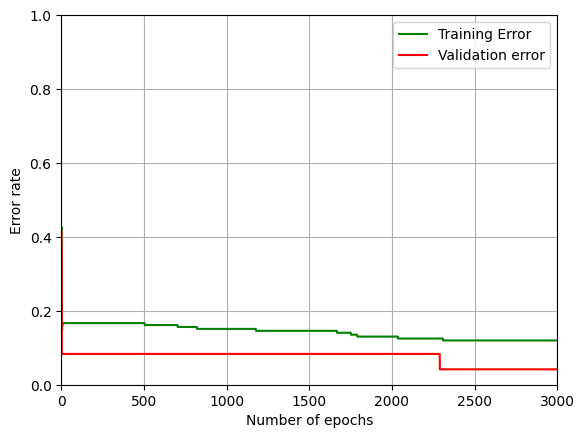

In [97]:
W13 = delta_batch_learning(data_T, epochs=3000)

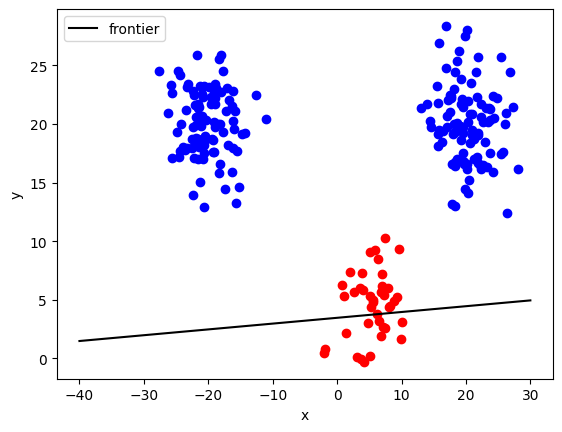

In [98]:
x_bis = np.linspace(-40,30,100)
y = -(W13[0,1]/W13[0,2])*x_bis-(W13[0,0]/W13[0,2])
plt.plot(x_bis,y, color='black', label='frontier')
plt.scatter(classA_T[0,:], classA_T[1,:], color='blue')
plt.scatter(classB_T[0,:], classB_T[1,:], color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()